have you ever wondered how natural language processing devices, such as Alexa or Siri are
able to make sense of words. You say something to Alexa, it takes that given sentence as input,
and somehow, Alexa is able to output words that pertain to the input. It's not alwyas perfect,
but it's still quite amazing. The answer is the creation of word embedding, or as I like to
call them, word vector spaces. Lets throw some code down in order to get a feel for how this stuff works

First were going to start with uploading our dataset and importing all of our modules

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
from gensim import models
import heapq
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

train = pd.read_csv('/Users/bennicholl/Desktop/datasets/train.csv')
test = pd.read_csv('/Users/bennicholl/Desktop/datasets/test.csv')  
extract_comments = train['id'],train['comment_text']

This dataset is from Kaggle. It contains a a list of thread comments from various sources. Lets
take a look at one comment. Remeber, there are thousands of comments in this dataset, but were
just going to take a gander at this one

In [172]:
extract_comments[1][40]

'"\n Sure, but the lead must briefly summarize Armenia\'s history. I simply added what I found necessary. If anyone thinks this or that sentence is redundant for the lead, they are welcome to remove make edits.  talk  "'

Our first step is to clean up the sentences, and seperate each word with a comma. By cleaning
up our sentences, I mean get rid of that \n in the begining, and all of our puncuation and 
what not. The reason we want to seperate each word by a comma is so we can train each 
individual word in a neural net. We'll get back to the whole neural net thing

In [173]:
def wrangle():
    """this list will be used to fill our cleaned up, comma seperated data"""
    comments = []
    """iterates through each document(text"""
    for e,i in enumerate(extract_comments[1]):
        """stores our comma seperted characters, EX. d,o,g, ,r,a,n"""
        comma_seperated_chars = []
        """iterates throguh each individual element(letter) in each document"""
        for ii in i:
            """if iterator points to character that is not irrelevant, such as comma, /, etc"""    
            if ii != ',' and ii != '/' and ii != '!' and ii != '.' and ii != ';' and ii != '"' and ii != '\n' and ii != '-' and ii != '?' and ii != '(' and ii != ')' and ii != '|' and ii != '@' and ii != '#' and ii != ' [ ' and ii != ' ] ':        
                """add character to our comma_seperated_chars list"""
                comma_seperated_chars.append(ii)
        """when this code gets ran, join our comma seperated chars to produce strings"""        
        comments.append(''.join(comma_seperated_chars))
        """split each string with a comma. EX. 'the', 'dog', 'ran' """
        comments[e] = comments[e].split()
    return comments
cleaned_up_comments = wrangle()

In [174]:
#Now lets print out our previous text again, but this time "cleaned up"
cleaned_up_comments[40]

['Sure',
 'but',
 'the',
 'lead',
 'must',
 'briefly',
 'summarize',
 "Armenia's",
 'history',
 'I',
 'simply',
 'added',
 'what',
 'I',
 'found',
 'necessary',
 'If',
 'anyone',
 'thinks',
 'this',
 'or',
 'that',
 'sentence',
 'is',
 'redundant',
 'for',
 'the',
 'lead',
 'they',
 'are',
 'welcome',
 'to',
 'remove',
 'make',
 'edits',
 'talk']

Awesome sauce. We now have our cleaned up comma seperated comments. Lets get back to that neural network stuff. I don't want to get to into how a neural net works. I'll save that for another time. Just know that it instantiates each word into a vector of n length, where n can be any length. Generally however, vectors run from 50 to over 300 numbers per vector. For this neural net, we are going to use Gensim Word2Vec's module. There methods give a lot of computational advantages, which we'll discuss later. If you'd like to check my own personal Word2Vec model that I engineered, check out the link below
("""https://github.com/bnicholl/word2vec_neural_net/blob/master/word2vector.py""")

In [175]:
def vector_space(comments, size = 200):
    model = models.Word2Vec(comments, size, min_count=1)      
    return model
vector_spaces = vector_space(cleaned_up_comments)

Now the words in our dataset are represented as a vector, or more simply put, a list of numbers.
Lets print out the word vector for dad so you can get a better idea of what I'm talking about

In [176]:
vector_spaces['dad'][:20]

array([ 0.16997753, -0.09484337, -0.39851171, -0.06462488,  0.26095104,
       -0.48107696, -0.0265111 , -0.58932251, -0.07836311,  0.14567468,
       -0.25959322, -0.70863342,  0.30679381,  0.00554582, -0.27043056,
       -0.17879841,  0.03216938,  0.02473903,  0.06508517,  0.12393942], dtype=float32)

What each float value above represents is a dimension that coresponds to some meaning. For example, maybe the first number in the vector corresponds to some level of authority, and mayby the second dimension coresponds to some level of masculinity. The fact of the matter is, we have no idea what each number, or dimension as I like to call them actually represents, but we can at least imagine it. 

For visual purposes, lets break this 20 dimensional vector down into 3 dimensions, then plot the vector space in a 3D plot. We'll use integer values to make the plot more visualy appealing. So the dimension values for dad will be  dad = (X,Y,Z) where X = 1.3, Y = 2.3, and Z = 3.0. So our vector for dad = (1.3, 2.3, 3.0). 

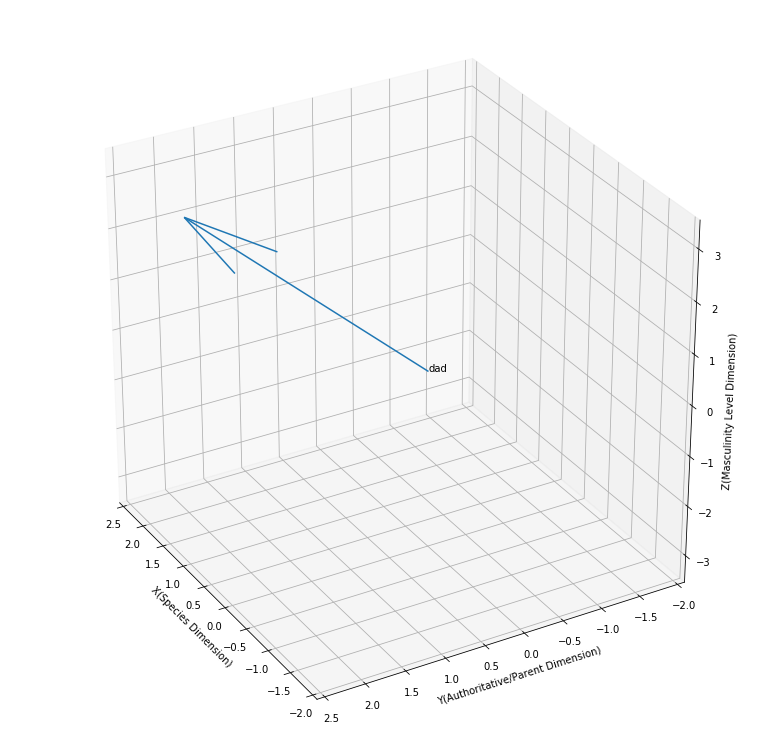

In [4]:
"""these are our "dad" coordinates""" 
dad_coords = 0
dad_dir = np.array([1.3, 2.3, 3.0])

fig = plt.figure(figsize = (13.5,13.5))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(azim=150)

xLabel = ax.set_xlabel('X(Species Dimension)', linespacing=3.2)
yLabel = ax.set_ylabel('Y(Authoritative/Parent Dimension)', linespacing=3.1)
zLabel = ax.set_zlabel('Z(Masculinity Level Dimension)', linespacing=3.4)

ax.set_xlim([-2, 2.5])
ax.set_ylim([-2, 2.5])
ax.set_zlim([-3.4, 3.4])

ax.quiver(dad_coords, dad_coords, dad_coords, dad_dir[0], dad_dir[1], dad_dir[2])
ax.text(dad_coords, dad_coords, dad_coords, 'dad')

As you can see on the plot, I went ahead and gave each dimension something to coorespond to. For example, the X dimension cooresponds to species. In this 3 dimensional word vector, the word dad points to this specific point in 3 dimensinal space. In a real word vector with 300 dimensions, it is the same concept, except instead of 3 dimensions, there may be 300 dimension. This can obviously get a little hard to visualize, even for an intuitive brain child like yourself.  

I know exactly what your thinking right now! Since each dimension theoretically coorseponds to some meaningful point in that dimension, what happens if we add or subtract vectors together? Lets go ahead and subtract the word man from the word dad.

dad =  [ 1.3  2.3  3. ]
man =  [ 1.5  0.3  3.1]
dad - man =  [-0.2  2.  -0.1]


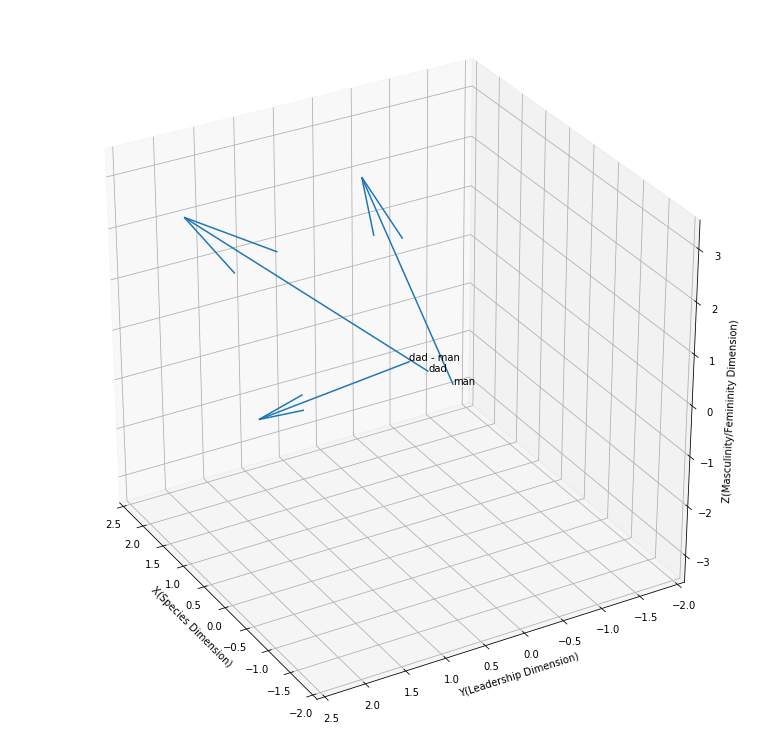

In [5]:
"""these are our "dad" coordinates""" 
dad_coords = 0
dad_dir = np.array([1.3, 2.3, 3.0])
"""these are our man coordinates"""
man_coords = -0.2
man_dir = np.array([1.5, .3, 3.1])
"""this is our dad_dir - our man_dir"""
dad_minus_man = dad_dir - man_dir

print('dad = ', dad_dir)
print('man = ', man_dir)
print('dad - man = ', dad_minus_man)

fig = plt.figure(figsize = (13.5,13.5))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(azim=150)

xLabel = ax.set_xlabel('X(Species Dimension)', linespacing=3.2)
yLabel = ax.set_ylabel('Y(Leadership Dimension)', linespacing=3.1)
zLabel = ax.set_zlabel('Z(Masculinity/Femininity Dimension)', linespacing=3.4)

ax.set_xlim([-2, 2.5])
ax.set_ylim([-2, 2.5])
ax.set_zlim([-3.4, 3.4])


ax.quiver(dad_coords, dad_coords, dad_coords, dad_dir[0], dad_dir[1], dad_dir[2])
ax.text(dad_coords, dad_coords, dad_coords, 'dad')
ax.quiver(man_coords, man_coords, man_coords, man_dir[0], man_dir[1], man_dir[2])
ax.text(man_coords, man_coords, man_coords, 'man')
ax.quiver(0.15,0.15,0.15, dad_minus_man[0], dad_minus_man[1], dad_minus_man[2])
ax.text(0.16,0.16,0.16, 'dad - man')

In order to understand what happened here, we need to look at the outcome of each individual dimension. We can see that the specieis dimension for dad is 1.3, and the specieis dimension for man is 1.5. The fact that they're close together makes sense, since dad is a term generally used for human fathers. But there are times when the term dad is used for animals as well, so it also makes sense that this dimension is not exactly the same. When we subtract man from dad, our species dimension becomes -0.2. This implies that our word vector is no longer pointing to something that is associated with that of a human. Maybe its pointing to a word that has strong associations with a dog, a whale, or even our good ol' friend chlamydia!  

The Y dimension, which is the Leadership Dimension seems to be around 2.3 when were talking about parent. Maybe if the leadership dimension was 3.0, we'd be talking about a CEO and at 1.5, were talking about the leader of a wolf pack. Either way, the word man does not seem to have very strong corelations to leadership, so the dimension changes rather subtly. 

For our masculinity/femininity dimesnion, we see a huge drop. Obviously, the word man has strong coorelations with being masculine, although that's debatable in 2018. Since the word dad implies male, and we are subtracting dad from man, we get a masculinity/femininity dimension close to 0. To me, this seems to imply, gender is not really associated with this word. This could be an object in which men and women use equally, like a desk, where as a place like the kitchen would be more associated with.. Ehhhhh, im just joshin

Now lets go ahead and add woman to our dad - man vector, and see what we come up with

dad =  [ 1.3  2.3  3. ]
man =  [ 1.5  0.3  3.1]
woman =  [ 1.5  0.2 -2.3]
dad - man =  [-0.2  2.  -0.1]
add woman (mom) =  [ 1.3  2.2 -2.4]


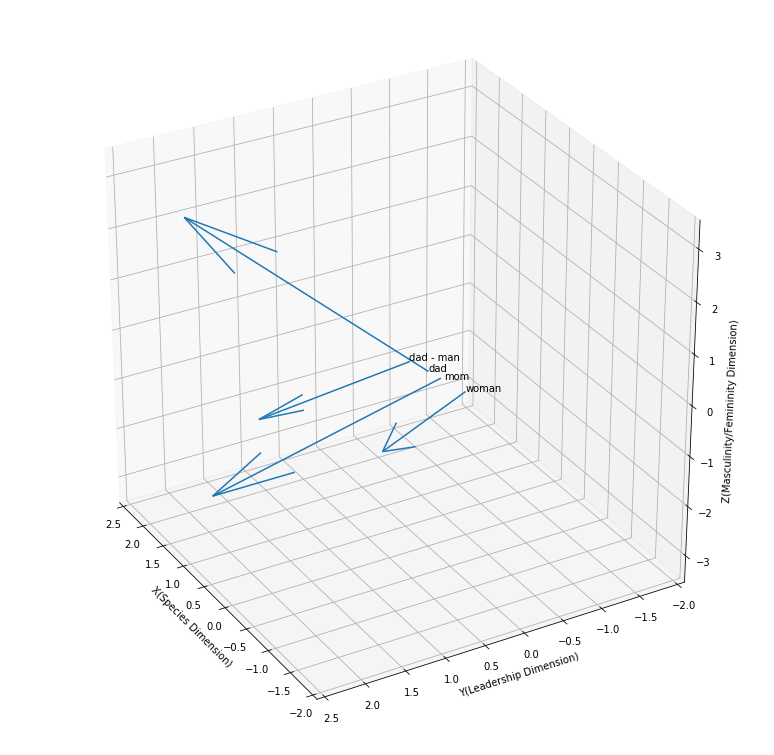

In [6]:
"""these are our "dad" coordinates""" 
dad_coords = 0
dad_dir = np.array([1.3, 2.3, 3.0])
"""these are our man coordinates"""
man_coords = -0.2
man_dir = np.array([1.5, .3, 3.1])
"""these are the women coordinates"""
woman_coords = -0.3
woman_dir = np.array([1.5, .2, -2.3])
"""this is our dad_dir - our man_dir"""
dad_minus_man = dad_dir - man_dir
"""we then add woman_dir, to our dad_minus_man vector"""
add_woman =  dad_minus_man + woman_dir

print('dad = ', dad_dir)
print('man = ', man_dir)
print('woman = ', woman_dir)
print('dad - man = ', dad_minus_man)
print('add woman (mom) = ', add_woman)

fig = plt.figure(figsize = (13.5,13.5))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(azim=150)

xLabel = ax.set_xlabel('X(Species Dimension)', linespacing=3.2)
yLabel = ax.set_ylabel('Y(Leadership Dimension)', linespacing=3.1)
zLabel = ax.set_zlabel('Z(Masculinity/Femininity Dimension)', linespacing=3.4)

ax.set_xlim([-2, 2.5])
ax.set_ylim([-2, 2.5])
ax.set_zlim([-3.4, 3.4])


ax.quiver(dad_coords, dad_coords, dad_coords, dad_dir[0], dad_dir[1], dad_dir[2])
ax.text(dad_coords, dad_coords, dad_coords, 'dad')

ax.quiver(woman_coords, woman_coords, woman_coords, woman_dir[0], woman_dir[1], woman_dir[2])
ax.text(woman_coords, woman_coords, woman_coords, 'woman')

ax.quiver(0.15,0.15,0.15, dad_minus_man[0], dad_minus_man[1], dad_minus_man[2])
ax.text(0.16,0.16,0.16, 'dad - man')

ax.quiver(-0.1,-0.1,-0.1, add_woman[0], add_woman[1], add_woman[2])
ax.text(-0.13,-0.13,-0.13, 'mom')

The vector "mom", is our dad - man + woman vector. Lets analyze each dimension again and try and make sense of it. For our species dimension, our value in our mom vector is the same as the value for our dad vector. Well, that seems to make sense. Our leadership dimesnion is also very close, with a difference of .1. Since both of these words coorespond with the leadership associated with being a parent, it makes sense that both of these words leadership dimension wold be very close. Finally we get to our Masculinity/Femininity dimension. For the word mom, since mom implies female, this dimension is -2.4. This is quite the a ways away from the dad's Masculinity/Femininity Dimension, which is 3. 

Now lets do some stuff with our actual vector dimensions that we ran through our neural network. We can calculate words that are most similiar to a given word by calculating the cosine of those words. In the library Gensim, they already have a built in method for getting the most similiar words of a given word! lets check it out

In [180]:
vector_spaces.wv.most_similar('angry') 

[('upset', 0.8790851831436157),
 ('mad', 0.8689506649971008),
 ('annoyed', 0.8403971791267395),
 ('pissed', 0.7525589466094971),
 ('insulted', 0.7311480045318604),
 ('shocked', 0.7218708992004395),
 ('annoying', 0.7214841246604919),
 ('busy', 0.7173768281936646),
 ('insulting', 0.7168519496917725),
 ('rude', 0.7167874574661255)]

The above list of words are the words with the highest cosine similiarity, and thus are considered most similiar. Lets go ahead and plot each dimension of the word angry, and some of the words that are most similiar to angry. But wait a minute, plotting a 200 dimensinal plot isn't going to work to well. In order to remedy this, I'm going to utilize a method known as metree de'compozishiooo which is French for matrix decomposition. In order to do this, I will stack all of these vectors together, than calculate the deviation of each dimension. I am than going to choose the three dimensions with the least amount of deviation and plot those points on a graph. The reason for choosing the dimesnion with the least deviation is so we can see the dimension where these words seem to have strong associations.

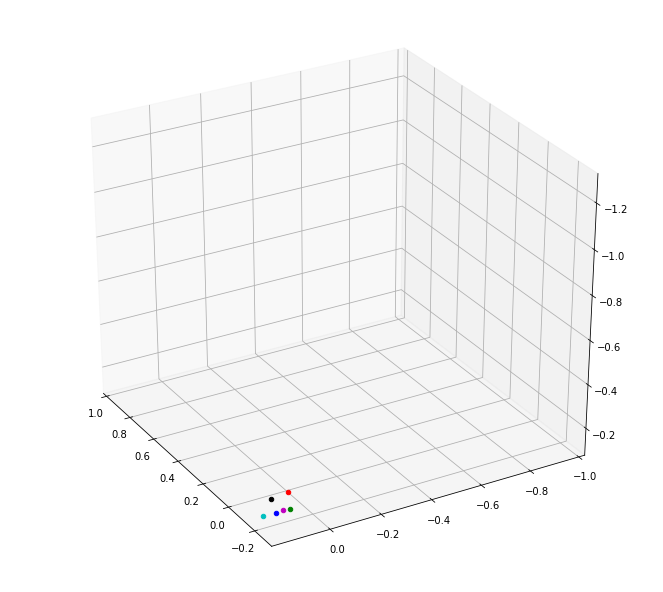

In [213]:
word_vecs = np.vstack([ vector_spaces.wv['angry'],vector_spaces.wv['mad'],vector_spaces.wv['upset'],vector_spaces.wv['annoyed'],vector_spaces.wv['pissed'],vector_spaces.wv['insulted'] ])
"""both empty lists and for loop directly under are responsible for calculating variances of all of our dimensions"""
variances = []
variances_before_sum = []
for i in word_vecs.T:
    for ii in i:       
        variances_before_sum.append(( (ii - (sum(i)/len(i)) )**2))       
    variances.append(sum(variances_before_sum)  / len(i) )
    variances_before_sum = []
variances = np.array(variances)

"""gets the smallest variances from our variance list"""
smallest_vars = heapq.nsmallest(3, variances)
"""create a smallest_vars_indices list which will append to via vstack function"""
smallest_vars_indices = np.array([0])
"""loop through smallest vars in order to get the coresponding indices of those values"""
for i in smallest_vars:    
    smallest_vars_indices = np.vstack( [smallest_vars_indices, np.where(variances == i)] )
smallest_vars_indices = np.delete(smallest_vars_indices, 0, 0)

"""these are our values that the smallest_vars_indices value points to for each respective word""" 
dimension_values = []
for e,i in enumerate(smallest_vars_indices):
    dimension_values.append([])
    for ii in word_vecs:
        dimension_values[e].append(ii[i].tolist())

        
fig = plt.figure(figsize = (11.5,10.5))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(azim=150)
ax.set_xlim([-0.30, 1])
ax.set_ylim([-1, 0.2])
ax.set_zlim([-0.1, -1.3])

"""each dot represents the three dimension in one training example"""
ax.scatter(dimension_values[0][0], dimension_values[1][0], dimension_values[2][0], c = 'b')
ax.scatter(dimension_values[0][1], dimension_values[1][1], dimension_values[2][1], c = 'g')
ax.scatter(dimension_values[0][2], dimension_values[1][2], dimension_values[2][2], c = 'k' )      
ax.scatter(dimension_values[0][3], dimension_values[1][3], dimension_values[2][3], c = 'r')   
ax.scatter(dimension_values[0][4], dimension_values[1][4], dimension_values[2][4], c = 'c')   
ax.scatter(dimension_values[0][5], dimension_values[1][5], dimension_values[2][5], c = 'm')        

The above plot plots the word angry, and the words that were considered similiar to angry. In order to utilize this data in a meaningful way, one thing we can do is to compare these data points with words that would be considered opposite. Lets go ahead and find words similiar to happy, which is what I think of as the opposite of angry. Keep in mind that we are going to use the same exact dimensions for happy and its similiar words as we did with angry and its similiar words.

In [214]:
vector_spaces.wv.most_similar('happy')

[('willing', 0.8062567710876465),
 ('glad', 0.7843818068504333),
 ('ready', 0.7840215563774109),
 ('hoping', 0.7513362169265747),
 ('pleased', 0.7450442314147949),
 ('inclined', 0.7207053899765015),
 ('afraid', 0.7200021743774414),
 ('tempted', 0.6986888647079468),
 ('prepared', 0.6940311193466187),
 ('able', 0.6898263692855835)]

It's important to notice how some of the words that are considered similiar to happy are not words that we'd think of as similiar to happy. For example, whats the deal with afraid? I think our neural network might have some cognitive deficiencies. One thing to keep in mind is that our neural network was trained on a dataset that contains thread comments. The purpose of this dataset was to classify negative, innapropriate, vulgar, prejudice, and threatening remarks. So in short, this dataset is going to output negativity more times than not. In other words, I basically trained this algorithm to be a douschebag. This is one reason for getting words like 'afraid' when calculating similiar words to 'happy'. Lets go ahead and plot these words.

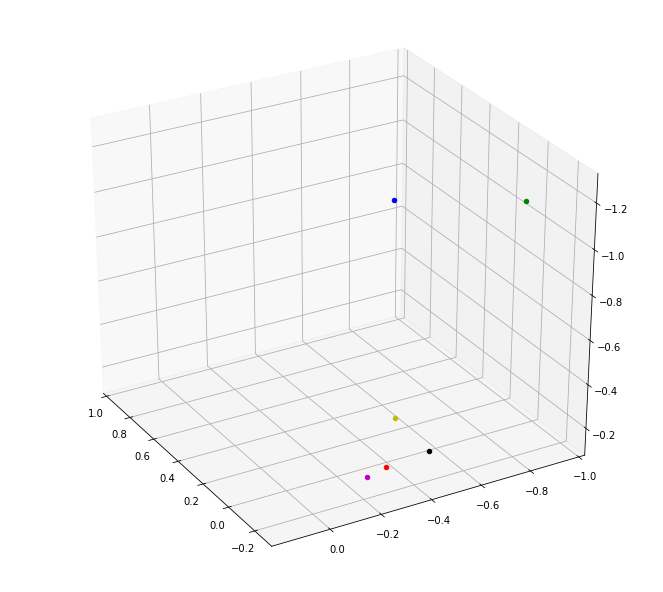

In [226]:
word_vecs2 = np.vstack([ vector_spaces.wv['happy'],vector_spaces.wv['willing'],vector_spaces.wv['glad'],vector_spaces.wv['ready'],vector_spaces.wv['hoping'],vector_spaces.wv['inclined'] ])
     
dimension_values2 = []
for e,i in enumerate(smallest_vars_indices):
    dimension_values2.append([])
    for ii in word_vecs2:
        dimension_values2[e].append(ii[i].tolist())    
    
fig = plt.figure(figsize = (11.5,10.5))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(azim=150)
ax.set_xlim([-0.30, 1])
ax.set_ylim([-1, 0.2])
ax.set_zlim([-0.1, -1.3])

"""each dot represents the three dimension in one training example"""
ax.scatter(dimension_values2[0][0], dimension_values2[1][0], dimension_values2[2][0], c = 'b')
ax.scatter(dimension_values2[0][1], dimension_values2[1][1], dimension_values2[2][1], c = 'g')
ax.scatter(dimension_values2[0][2], dimension_values2[1][2], dimension_values2[2][2], c = 'k' )      
ax.scatter(dimension_values2[0][3], dimension_values2[1][3], dimension_values2[2][3], c = 'r')      
ax.scatter(dimension_values2[0][4], dimension_values2[1][4], dimension_values2[2][4], c = 'y')   
ax.scatter(dimension_values2[0][5], dimension_values2[1][5], dimension_values2[2][5], c = 'm')    

Lets plot both of these points on one plot, with angry and its cooresponding words marked as black dots, and happy and its coorepsonding words marked as blue dots

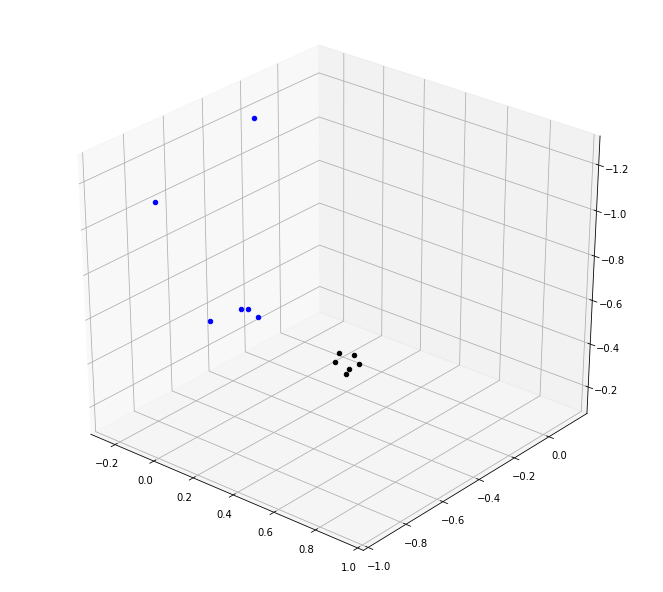

In [253]:
fig = plt.figure(figsize = (11.5,10.5))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(azim=1030)
ax.set_xlim([-0.30, 1])
ax.set_ylim([-1, 0.2])
ax.set_zlim([-0.1, -1.3])

ax.scatter(dimension_values[0][0], dimension_values[1][0], dimension_values[2][0], c = 'k')
ax.scatter(dimension_values[0][1], dimension_values[1][1], dimension_values[2][1], c = 'k')
ax.scatter(dimension_values[0][2], dimension_values[1][2], dimension_values[2][2], c = 'k' )      
ax.scatter(dimension_values[0][3], dimension_values[1][3], dimension_values[2][3], c = 'k')   
ax.scatter(dimension_values[0][4], dimension_values[1][4], dimension_values[2][4], c = 'k')   
ax.scatter(dimension_values[0][5], dimension_values[1][5], dimension_values[2][5], c = 'k')  

ax.scatter(dimension_values2[0][0], dimension_values2[1][0], dimension_values2[2][0], c = 'b')
ax.scatter(dimension_values2[0][1], dimension_values2[1][1], dimension_values2[2][1], c = 'b')
ax.scatter(dimension_values2[0][2], dimension_values2[1][2], dimension_values2[2][2], c = 'b' )      
ax.scatter(dimension_values2[0][3], dimension_values2[1][3], dimension_values2[2][3], c = 'b')      
ax.scatter(dimension_values2[0][4], dimension_values2[1][4], dimension_values2[2][4], c = 'b')   
ax.scatter(dimension_values2[0][5], dimension_values2[1][5], dimension_values2[2][5], c = 'b') 

As you can see, there are differences in the spaces that these words choose to be in. The words similiar to angry are clustered more tightly, as expected since we took the dimension with least variance from those vectors. It seems as though the words similiar to happy like to be more negative in the X dimension, and more positive in the Z dimension. In the Y dimension, however, there seems to be little variance between the two. 
Maybe 0.1 on the Y dimension has to do with an emotinal state of being, such as being angry or happy. Going more negative in the Y dimension might be more assicated with a physical action, such as running or swimming. And maybe the X dimension has to do with negativity, which is why words similiar to angry tend to cluster around a differnt plane on the X dimension than the words similiar to happy. I'll leave it up to you to ponder what the Y dimension might look for!   